# Basic Classifiers

Fitting simply classifiers as baseline

* [Linear Regression](#Linear-Regression)
* [Decision Tree Classifier](#Decision-Tree-Classifier)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [4]:
teledf = pd.read_csv('data/teledf_final.csv', index_col = 0)
teledf.head()

,Area code_408,Area code_415,Area code_510,Voice mail plan,Churn,International plan,Customer service calls,Total day minutes,Total day charge,Number vmail messages,Total day minutes.1,Total day calls,Total day charge.1,Total eve minutes,Total eve charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls.1
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,265.1,45.07,25.0,265.1,110.0,45.07,197.4,16.78,10.0,3.0,2.70,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,161.6,27.47,26.0,161.6,123.0,27.47,195.5,16.62,13.7,3.0,3.70,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,243.4,41.38,0.0,243.4,114.0,41.38,121.2,10.30,12.2,5.0,3.29,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,2.0,299.4,50.90,0.0,299.4,71.0,50.90,61.9,5.26,6.6,7.0,1.78,2.0
4,0.0,1.0,0.0,0.0,0.0,1.0,3.0,166.7,28.34,0.0,166.7,113.0,28.34,148.3,12.61,10.1,3.0,2.73,3.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [7]:
X = teledf.drop(columns = 'Churn')
y = teledf['Churn']

X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size = 0.2, random_state = 42)

# Logistic Regression

In [14]:
lr = LogisticRegression(random_state = 42)

lr.fit(X_train, y_train)

C:\Users\AK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
lr.score(X_train,y_train), lr.score(X_test, y_test)

(0.8564727954971857, 0.8620689655172413)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

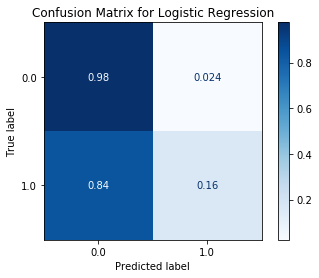

In [17]:
plot_confusion_matrix(lr, 
                      X_test,
                      y_test,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for Logistic Regression')

# Decision Tree Classifier

In [9]:
dtc = DecisionTreeClassifier(random_state = 42)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [10]:

dtc.score(X_train,y_train), dtc.score(X_test, y_test)

(1.0, 0.9130434782608695)

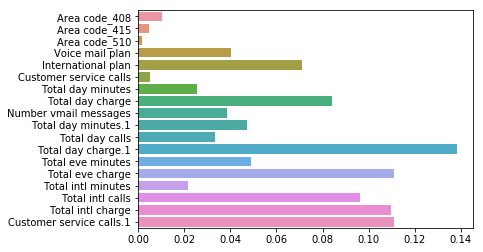

In [11]:
sns.barplot(y=X.columns,x=dtc.feature_importances_)

In [12]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

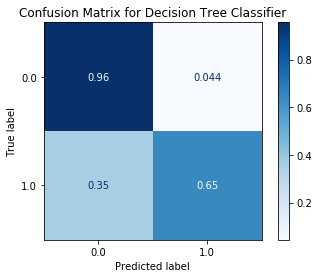

In [18]:
plot_confusion_matrix(dtc, 
                      X_test,
                      y_test,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for Decision Tree Classifier')